https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("star_classification.csv")
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [3]:
len(df.columns)

18

In [4]:
df["rerun_ID"].value_counts()

rerun_ID
301    100000
Name: count, dtype: int64

In [5]:
sum(df["run_ID"].value_counts())

100000

In [6]:
df["run_ID"].value_counts()

run_ID
3699    2450
4263    2295
3225    2275
2964    2009
7717    1782
        ... 
6514       1
1336       1
297        1
287        1
6074       1
Name: count, Length: 430, dtype: int64

In [20]:
columns_with_ID = [col for col in df.columns.to_list() if col.endswith("_ID")]

In [21]:
columns_with_ID = columns_with_ID + ["MJD", "plate", "cam_col"]

In [22]:
df.drop(columns = columns_with_ID, inplace = True)

In [33]:
df.describe()

,alpha,delta,u,g,r,i,z,class,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,0.595160,0.576661
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,0.787509,0.730707
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,0.000000,-0.009971
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,0.000000,0.054517
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,0.000000,0.424173
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,1.000000,0.704154
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,2.000000,7.011245


In [26]:
df.sample(8)

,alpha,delta,u,g,r,i,z,class,redshift
25781,35.248295,1.091045,19.99690,18.68184,17.73002,17.26882,16.99636,GALAXY,0.195499
23987,216.282840,13.035748,26.98734,21.86557,20.23218,19.30211,19.06907,GALAXY,0.503494
77216,348.387213,3.560876,26.62321,22.28866,20.67380,19.71362,19.25071,GALAXY,0.526524
40894,5.463136,-10.958662,20.57991,18.55113,17.67352,17.35482,17.18939,STAR,0.000108
97069,161.368222,15.272031,24.13810,21.90541,20.26276,19.43327,19.01306,GALAXY,0.480751
409,174.276274,7.487240,19.59602,17.63315,16.53565,16.08111,15.69071,GALAXY,0.132939
68887,350.609914,26.874404,20.10928,19.75780,19.37754,19.25429,19.05994,QSO,2.102515
45655,240.960375,15.266272,27.09992,21.48718,19.96831,19.15115,18.64065,GALAXY,0.488094


In [18]:
df.isnull().sum()

alpha       0
delta       0
u           0
g           0
r           0
i           0
z           0
cam_col     0
class       0
redshift    0
dtype: int64

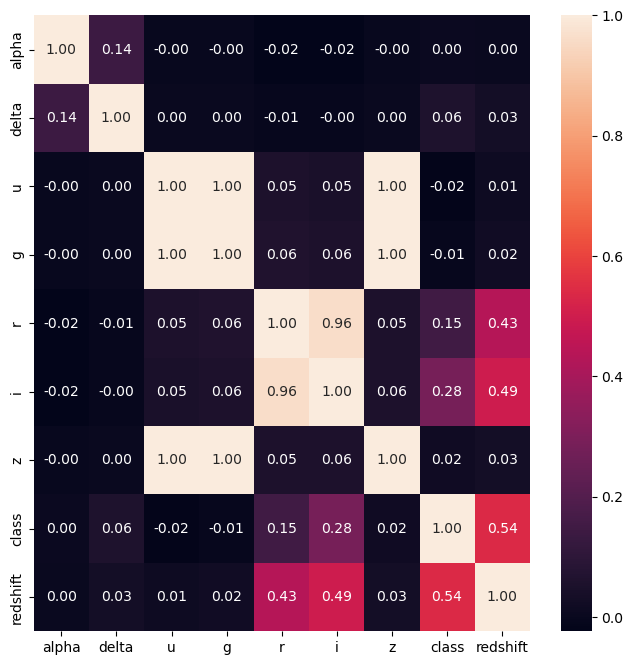

In [27]:
df["class"] = df["class"].map({"GALAXY" : 0, "STAR" : 1, "QSO" : 2})
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

In [28]:
df["class"].value_counts()

class
0    59445
1    21594
2    18961
Name: count, dtype: int64

In [29]:
df_dropped = df.drop(columns = ['g', 'i']).copy()

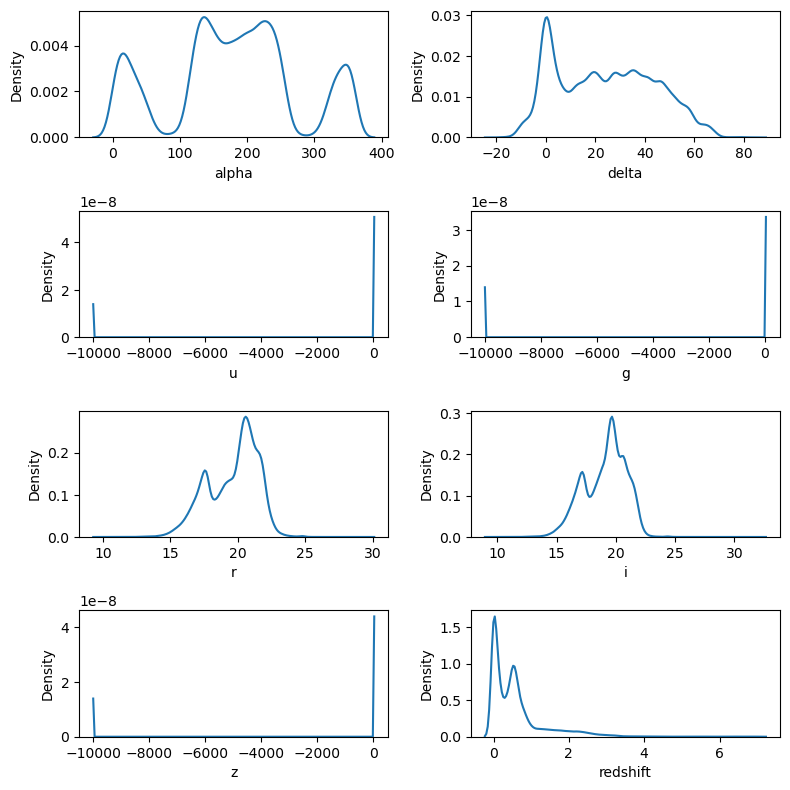

In [31]:
fig, axis = plt.subplots(nrows = 4, ncols = 2, figsize = (8, 8))
cols_for_graph = df.drop("class", axis = 1).columns.to_list()
k = 0
for i in range(4):
    for j in range(2):
        sns.kdeplot(x = df[cols_for_graph[k]], ax = axis[i][j])
        k = k + 1
plt.tight_layout()
plt.show()

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [88]:
X = df_dropped.drop("class", axis = 1)
y = df_dropped["class"]

In [89]:
X.isnull().sum()

alpha       0
delta       0
u           0
r           0
z           0
redshift    0
dtype: int64

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [91]:
X_train.isnull().sum()

alpha       0
delta       0
u           0
r           0
z           0
redshift    0
dtype: int64

In [92]:
st1 = StandardScaler()
X_train[df_dropped.drop("class", axis = 1).columns.to_list()] = st1.fit_transform(X_train)
X_test[df_dropped.drop("class", axis = 1).columns.to_list()] = st1.transform(X_test)

IndexError: list index out of range

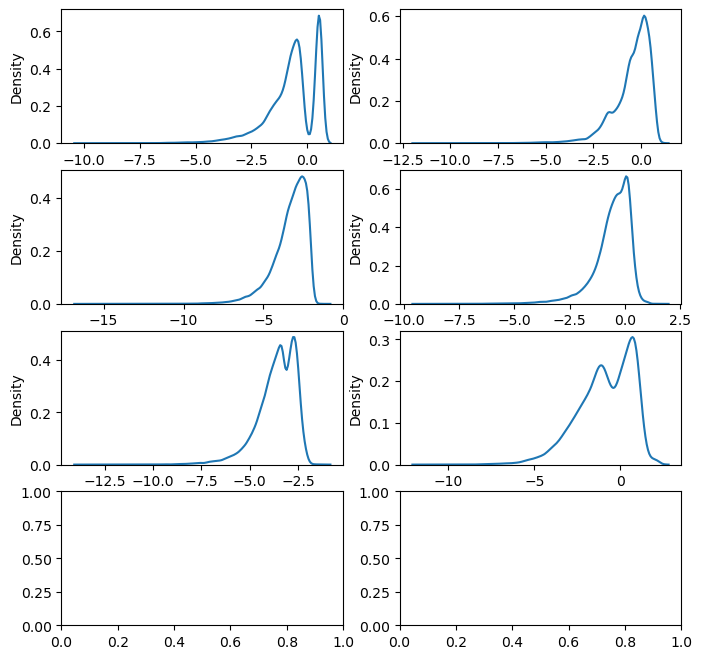

In [44]:
fig, axis = plt.subplots(nrows = 4, ncols = 2, figsize = (8, 8))
cols_for_graph = df_dropped.drop("class", axis = 1).columns.to_list()
k = 0
for i in range(4):
    for j in range(2):
        sns.kdeplot(x = X_train[cols_for_graph[k]], ax = axis[i][j])
        k = k + 1
plt.tight_layout()
plt.show()

In [95]:
from sklearn.preprocessing import PowerTransformer
pt1 = PowerTransformer()
X_train[df_dropped.drop("class", axis = 1).columns.to_list()] = pt1.fit_transform(X_train)
X_test[df_dropped.drop("class", axis = 1).columns.to_list()] = pt1.transform(X_test)

IndexError: list index out of range

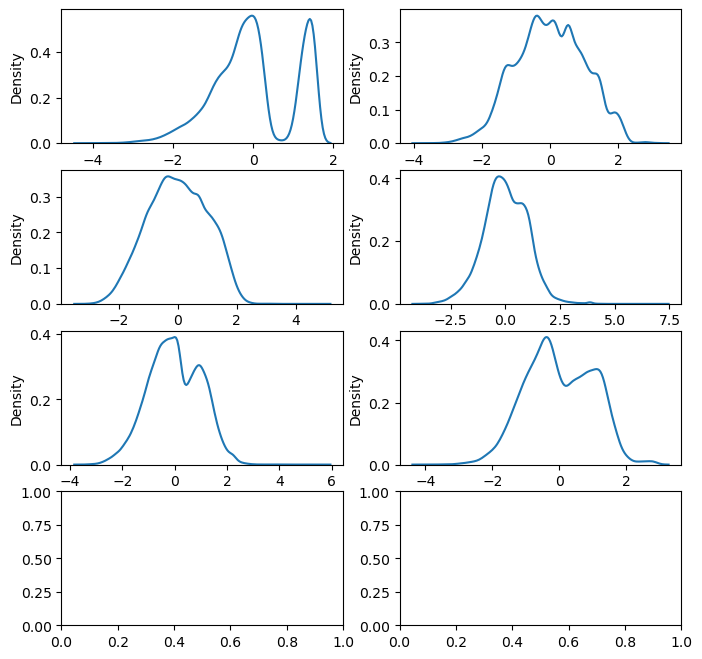

In [46]:
fig, axis = plt.subplots(nrows = 4, ncols = 2, figsize = (8, 8))
cols_for_graph = df_dropped.drop("class", axis = 1).columns.to_list()
k = 0
for i in range(4):
    for j in range(2):
        sns.kdeplot(x = X_train[cols_for_graph[k]], ax = axis[i][j])
        k = k + 1
plt.tight_layout()
plt.show()

In [96]:
rfc = RandomForestClassifier(n_jobs = -1)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

<Axes: >

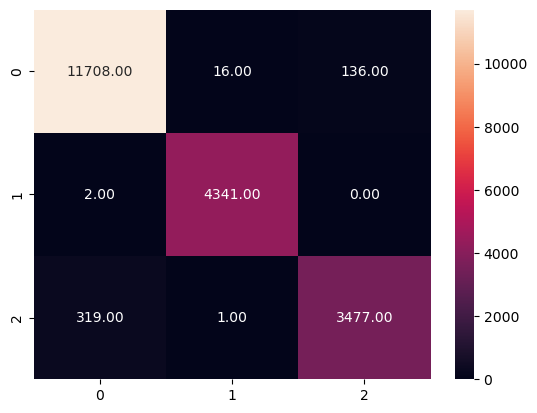

In [97]:
sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test)), annot = True, fmt = ".2f")

In [98]:
df.shape

(100000, 9)

In [99]:
from imblearn.ensemble import EasyEnsembleClassifier

In [100]:
eec = EasyEnsembleClassifier(n_jobs = -1)
param_grid = {"n_estimators" : [10, 20, 30, 40, 50]}

In [101]:
eec_cv = GridSearchCV(eec, param_grid = param_grid, cv = 3, n_jobs = -1)
eec_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=EasyEnsembleClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 30, 40, 50]})

In [102]:
eec_best = eec_cv.best_estimator_
eec_best.fit(X_train, y_train)

EasyEnsembleClassifier(n_estimators=20, n_jobs=-1)

<Axes: >

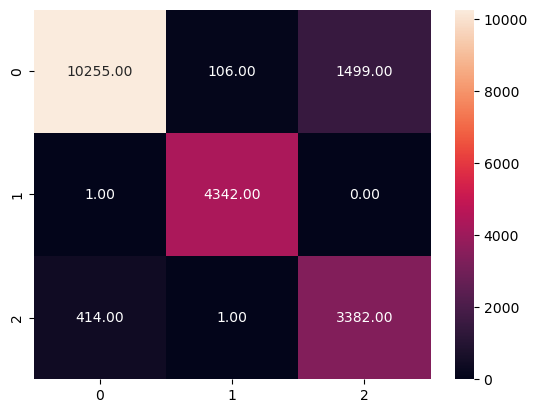

In [103]:
sns.heatmap(confusion_matrix(y_test, eec_best.predict(X_test)), annot = True, fmt = ".2f")

<Axes: >

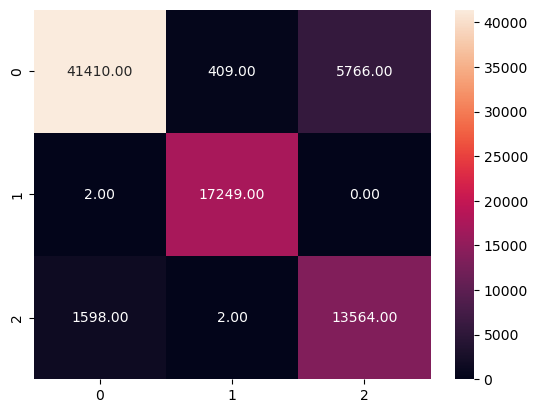

In [104]:
sns.heatmap(confusion_matrix(y_train, eec_best.predict(X_train)), annot = True, fmt = ".2f")

### Stacking Classifier

In [105]:
from sklearn.ensemble import StackingClassifier

In [114]:
estimators_layer1 = [("lr1", LogisticRegression()), ("dt1", DecisionTreeClassifier()), ("svc1", SVC())]

layer1 = StackingClassifier(estimators = estimators_layer1, final_estimator = RandomForestClassifier(), cv = 3)

In [115]:
estimators_layer2 = [("layer1", layer1),("lr1", LogisticRegression()), ("dt1", DecisionTreeClassifier()), ("svc1", SVC())]

layer2 = StackingClassifier(estimators = estimators_layer2, final_estimator = RandomForestClassifier(), n_jobs = -1, cv = 3)

In [116]:
layer2.fit(X_train, y_train)

KeyboardInterrupt: 

### Over Sampling

In [117]:
from imblearn.over_sampling import RandomOverSampler

In [119]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [128]:
from sklearn.ensemble import VotingClassifier

In [136]:
estimators = [("lr1", LogisticRegression()), ("dt1", DecisionTreeClassifier()), ("svc1", SVC())]
vc = VotingClassifier(
            estimators = estimators, voting = "hard", n_jobs = -1
)

In [138]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('lr1', LogisticRegression()),
                             ('dt1', DecisionTreeClassifier()),
                             ('svc1', SVC())],
                 n_jobs=-1)

<Axes: >

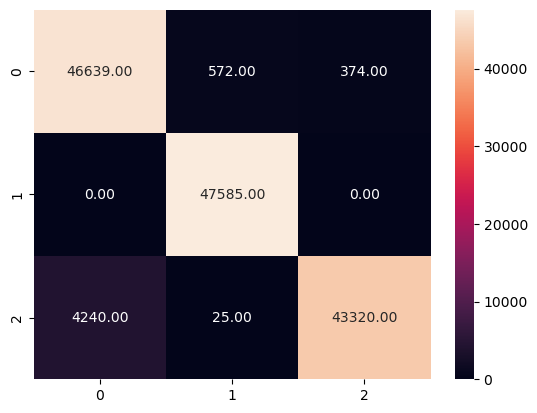

In [139]:
sns.heatmap(confusion_matrix(y_train_ros, vc.predict(X_train_ros)), annot = True, fmt = ".2f")

In [125]:
lr = LogisticRegression(class_weight = {0 : 0.4, 1 : 0.4, 2 : 0.99})
lr.fit(X_train_ros, y_train_ros)

LogisticRegression(class_weight={0: 0.4, 1: 0.4, 2: 0.99})

<Axes: >

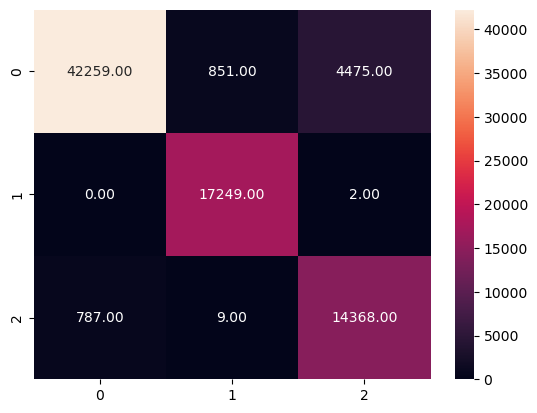

In [127]:
sns.heatmap(confusion_matrix(y_train, lr.predict(X_train)), annot = True, fmt = ".2f")

### Random Under Sampling

In [140]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [141]:
estimators = [("lr1", LogisticRegression()), ("dt1", DecisionTreeClassifier()), ("svc1", SVC())]
vc = VotingClassifier(
            estimators = estimators, voting = "hard", n_jobs = -1
)

In [142]:
vc.fit(X_train_rus, y_train_rus)

VotingClassifier(estimators=[('lr1', LogisticRegression()),
                             ('dt1', DecisionTreeClassifier()),
                             ('svc1', SVC())],
                 n_jobs=-1)

<Axes: >

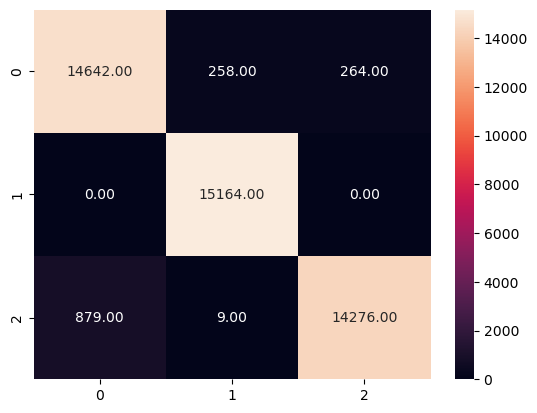

In [144]:
sns.heatmap(confusion_matrix(y_train_rus, vc.predict(X_train_rus)), annot = True, fmt = ".2f")

### Ada Boost Classifier

In [145]:
from sklearn.ensemble import AdaBoostClassifier

In [150]:
abc = AdaBoostClassifier(n_estimators = 250)
abc.fit(X_train, y_train)

E:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=250)

<Axes: >

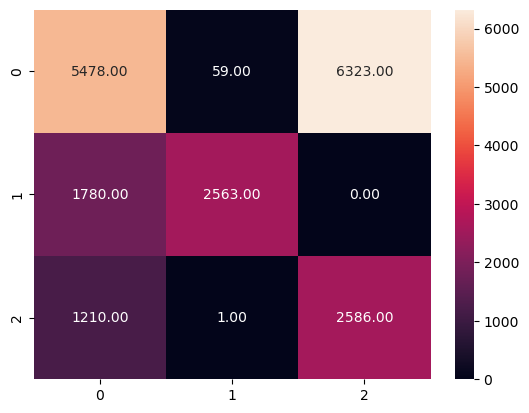

In [151]:
sns.heatmap(confusion_matrix(y_test, abc.predict(X_test)), annot = True, fmt = ".2f")

### XGBoost

In [152]:
import xgboost as xgb

In [155]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xgb_clf.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

<Axes: >

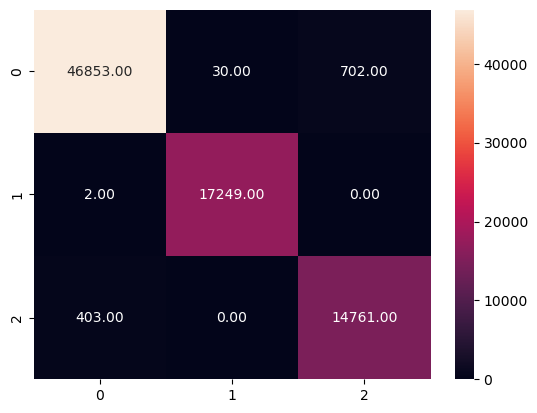

In [157]:
sns.heatmap(confusion_matrix(y_train, xgb_clf.predict(X_train)), annot = True, fmt = ".2f")

### HistGradientBoostingClassifier

In [158]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [159]:
param_grid = {"max_leaf_nodes" : [8, 15, 20, 25, 29], "learning_rate" : [0.1, 0.2, 0.3, 0.4], "min_samples_leaf" : [3, 4, 5]}

In [160]:
hgbc_cv = GridSearchCV(HistGradientBoostingClassifier(), param_grid = param_grid, n_jobs = -1, cv = 2)

In [161]:
hgbc_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=HistGradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'max_leaf_nodes': [8, 15, 20, 25, 29],
                         'min_samples_leaf': [3, 4, 5]})

In [166]:
hgbc = hgbc_cv.best_estimator_

In [172]:
hgbc.fit(X_train_ros, y_train_ros)

HistGradientBoostingClassifier(max_leaf_nodes=29, min_samples_leaf=5)

<Axes: >

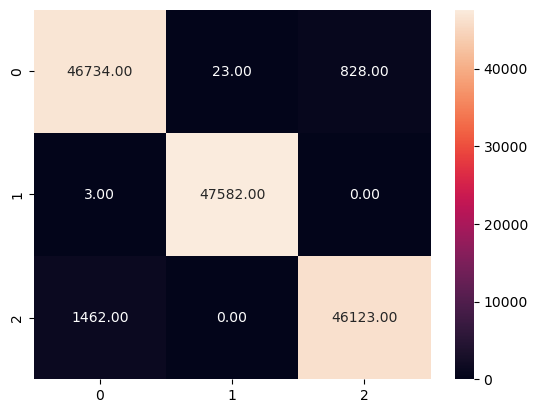

In [174]:
sns.heatmap(confusion_matrix(y_train_ros, hgbc.predict(X_train_ros)), annot = True, fmt = ".2f")

### The best model